# ECG Dataset

---
I. Problem definition

1. Import Main Packages
2. Get Data
3. Explore the data to gain insights:
4. Data Processing
5. Base Model
6. Feature Selection
7. Tackling Class imbalance
8. Hyperparameter Tuning
9. Final Model Evaluation

---

## I. Problem definition
 ECG is the electrical activity of the heartbeat, which can be used to identify problems and illnesses of the heart. The electrical activity is measured over time, where a typical patterns appears for every heartbeat. The goal here is to recognise unusual ECG Measurements. Furthermore the type of anomaly can be identified.

## 1. Import Main Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
# Shows plots in jupyter notebook
%matplotlib inline
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
import math
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
import keras.callbacks
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
import joblib
from os.path import exists
from keras.models import load_model
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from keras.optimizers import schedules
from tensorflow.keras.callbacks import ModelCheckpoint
import joblib

## 2. Get Data

In [2]:
df = pd.read_csv("mitbih_train.csv", header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Explore the data to gain insights:

### General Overview over the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


Check for null values.

In [6]:
df.isnull().values.sum()

0

### Study the target attribute

Check the number of cases for each class.

In [7]:
df[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

Visualize classes of the target attribute

([<matplotlib.patches.Wedge at 0x1240005bc10>,
 [Text(-0.9427974976112825, 0.5666858728589446, 'Normal'),
  Text(0.7246136625914988, -0.8276080231521041, 'Unknown'),
  Text(1.0074182091923962, -0.44171093691189695, 'Ventricular'),
  Text(1.091312106928212, -0.13797784340939367, 'Supraventricular'),
  Text(1.0997090556586326, -0.025298081002296184, 'Fusion')],
 [Text(-0.5142531805152449, 0.30910138519578795, '82.8%'),
  Text(0.3952438159589993, -0.45142255808296583, '7.3%'),
  Text(0.5495008413776705, -0.2409332383155801, '6.6%'),
  Text(0.5952611492335701, -0.07526064185966927, '2.5%'),
  Text(0.5998413030865268, -0.013798953273979736, '0.7%')])

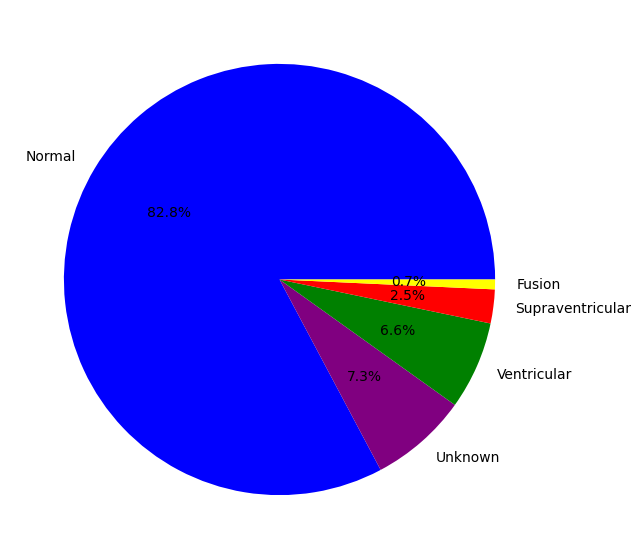

In [8]:
plt.figure(figsize=(7,7))
plt.pie(df[187].value_counts(), labels = ["Normal","Unknown","Ventricular","Supraventricular","Fusion"],colors= ['blue','purple','green','red','yellow'],autopct='%3.1f%%')

In [9]:
color = ['blue','red','green','yellow','purple']
label = ["Normal","Supraventricular","Ventricular",
         "Fusion","Unknown"]

### Exploring features

Showing one case for each class in comparison.

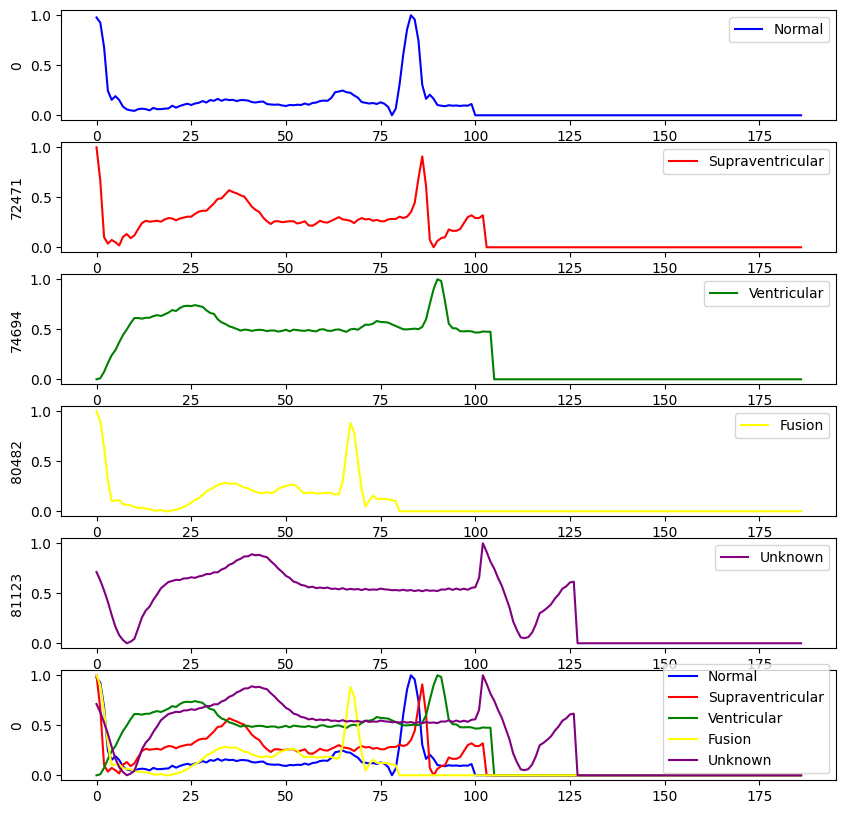

In [10]:
fig, ax = plt.subplots(6, figsize=(10, 10))

for i in range(5):
    t = sns.lineplot((df[df[187] == i].iloc[0])[:-1], label=label[i], color=color[i], ax=ax[i])
    t = sns.lineplot((df[df[187] == i].iloc[0])[:-1], label=label[i], color=color[i], ax=ax[5])


100 cases for each class are presented together to show the variance in each class.

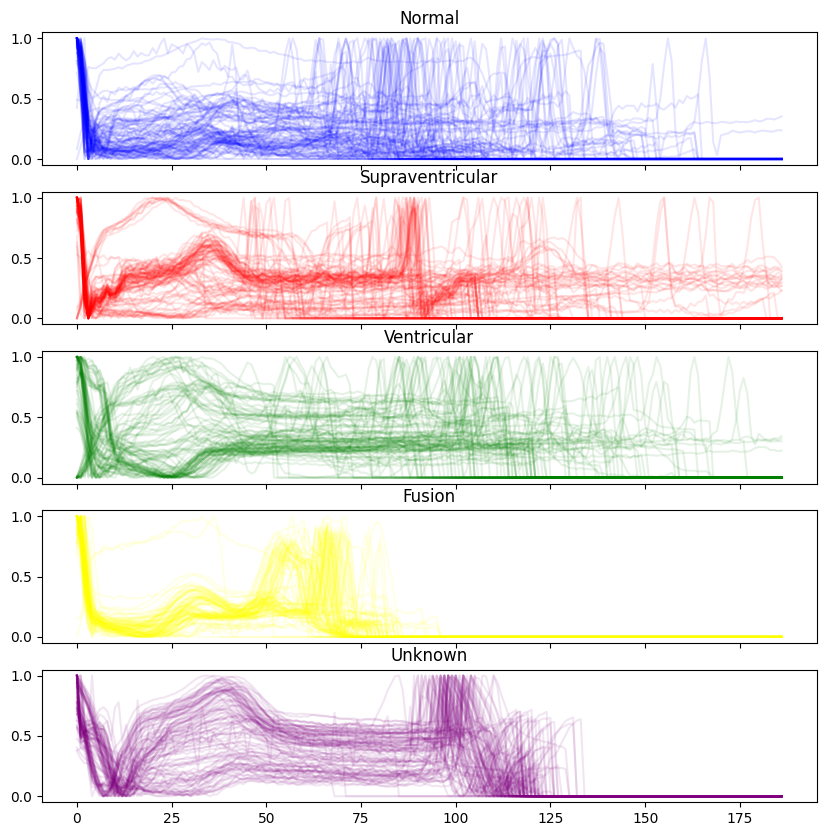

In [11]:
fig, ax = plt.subplots(5,  sharex=True, sharey=True,figsize=(10,10))
for j in range(5):
    for i in range(100):
        t = ax[j].plot((df[df[187] == j].iloc[i])[:-1], color=color[j], alpha = 0.1)
    ax[j].title.set_text(label[j]) 

### Key findings of this section

-All features (187) are numeric and form the ECG signal
-All features are capped at 1
-A lot of values are close to 0, especially at the end of the signals
-The class "normal" accounts for over 82% of the whole dataset
-Classes exhibit visible differences
-Fusion looks especially different than the other cases

### Promising Methods and transformations

-This dataset is highly unbalanced so a oversampling technique or class weights could help
-There are many features, many of them are close to 0 and because of that not important: A pca could significantly reduce dimensionality of the dataset
-I will focus on ANN's in this notebook for training (usually many different models should be tested)

## 4. Data Processing

### Standard dataprocessing steps
Drop duplicates.

In [12]:
print(df.shape)
df.drop_duplicates(keep=False, inplace=True)
df.shape

(87554, 188)


(87554, 188)

Division of the data set into equally distributed validation and trainings set

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, valid_index in split.split(df, df[187]):
    X_train_base = df.iloc[train_index]
    X_valid_base = df.iloc[valid_index]

In [14]:
X_train_base[187].value_counts() / len(X_train_base)

0.0    0.827734
4.0    0.073455
2.0    0.066102
1.0    0.025384
3.0    0.007324
Name: 187, dtype: float64

In [15]:
X_valid_base[187].value_counts() / len(X_valid_base)

0.0    0.827708
4.0    0.073440
2.0    0.066130
1.0    0.025413
3.0    0.007310
Name: 187, dtype: float64

Division into features and labels.

In [16]:
y_train = X_train_base[187]
y_valid = X_valid_base[187]
X_train_base.pop(187)
X_valid_base.pop(187)


32695    0.0
57704    0.0
69505    0.0
16459    0.0
57169    0.0
        ... 
28885    0.0
55809    0.0
62061    0.0
50975    0.0
68323    0.0
Name: 187, Length: 17511, dtype: float64

Scaling of the data.

In [17]:
scaler=StandardScaler()

In [18]:
X_train_base = scaler.fit_transform(X_train_base)
X_train_base = pd.DataFrame(X_train_base)
X_valid_base = scaler.transform(X_valid_base)
X_valid_base = pd.DataFrame(X_valid_base)


## 5. Base Model

The base model will give a first impression on the accuracy that can be achieved without much finetuning.
I chose this architecture, activation function and kernel_initializer to profit from self normalization of the model

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train_base.shape[1:]))
model.add(keras.layers.Dense(50,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(50,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.Dense(5, activation="softmax"))

optimizer=keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


In [20]:
# Implement early-stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

In [21]:
# Train the base model
#loaded_model = joblib.load(filename)
if exists('base_model.h5'):
    model = tensorflow.keras.models.load_model('base_model.h5')
else:
    history=model.fit(X_train_base, y_train, epochs=100,
          validation_data=(X_valid_base,y_valid),
          callbacks = early_stopping_cb, batch_size=32)# class_weight=class_weights)

Epoch 1/100
2189/2189 [==============================] - 11s 4ms/step - loss: 0.2187 - accuracy: 0.9404 - val_loss: 0.1517 - val_accuracy: 0.9584
Epoch 2/100
2189/2189 [==============================] - 8s 4ms/step - loss: 0.1462 - accuracy: 0.9600 - val_loss: 0.1326 - val_accuracy: 0.9625
Epoch 3/100
2189/2189 [==============================] - 8s 4ms/step - loss: 0.1261 - accuracy: 0.9662 - val_loss: 0.1147 - val_accuracy: 0.9698
Epoch 4/100
2189/2189 [==============================] - 8s 4ms/step - loss: 0.1149 - accuracy: 0.9689 - val_loss: 0.1215 - val_accuracy: 0.9658
Epoch 5/100
2189/2189 [==============================] - 8s 4ms/step - loss: 0.1040 - accuracy: 0.9710 - val_loss: 0.1066 - val_accuracy: 0.9686
Epoch 6/100
2189/2189 [==============================] - 7s 3ms/step - loss: 0.0990 - accuracy: 0.9723 - val_loss: 0.1077 - val_accuracy: 0.9690
Epoch 7/100
2189/2189 [==============================] - 7s 3ms/step - loss: 0.0944 - accuracy: 0.9735 - val_loss: 0.1000 - val_a

In [22]:
#joblib.dump(model, 'base_model.sav')
if not exists('base_model.h5'):
    model.save('base_model.h5')

In [23]:
# Gives predictions for validation data
predictions = model.predict(X_valid_base)

548/548 [==============================] - 1s 1ms/step


In [24]:
# Classification Report about the Prediction
predictions=np.argmax(predictions, axis=1)
print(classification_report(y_valid, predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     14494
         1.0       0.92      0.70      0.79       445
         2.0       0.95      0.93      0.94      1158
         3.0       0.88      0.55      0.68       128
         4.0       0.98      0.98      0.98      1286

    accuracy                           0.98     17511
   macro avg       0.94      0.83      0.88     17511
weighted avg       0.98      0.98      0.98     17511



In [25]:
# Evaluate the model
model.evaluate(X_valid_base, y_valid)

548/548 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9785


[0.08539048582315445, 0.9784706830978394]

The accuracy is already quite good with 97.57% but it could be improved with feature selection, techniques to tackle the class inbalance and Hyperparametertuning.

## 6. Feature Selection

For Feature Selection i use a PCA that keeps 97% of the variance in the dataset.

In [26]:

class PCA_97_Selector(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_reduced = pca_fit.transform(X)
        X=pd.DataFrame(X_reduced)
        return X

In [27]:
pca = PCA(n_components=0.97)
pca_fit = pca.fit(X_train_base)

In [28]:
pipeline =  Pipeline([
        ("scaler", StandardScaler()),
        ("PCA", PCA_97_Selector())
])

In [29]:
X_train_pca = pipeline.fit_transform(X_train_base)
X_train_pca= pd.DataFrame(X_train_pca)
X_valid_pca = pipeline.fit_transform(X_valid_base)
X_valid_pca = pd.DataFrame(X_valid_pca)


In [30]:
X_train_pca.shape

(70043, 52)

The number of features were reduced from 187 to only 52.
Lets try these new features! Hopefully our accuracy did not decrease.

In [31]:
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train_pca.shape[1:]))
model.add(keras.layers.Dense(50,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(50,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.Dense(5, activation="softmax"))

optimizer=keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [32]:
if exists('model_pca.h5'):
    model = tensorflow.keras.models.load_model('model_pca.h5')
else:
    history=model.fit(X_train_pca, y_train, epochs=100,
          validation_data=(X_valid_pca,y_valid),
          callbacks = early_stopping_cb, batch_size=32)

In [33]:
if not exists('model_pca.h5'):
    model.save('model_pca.h5')

In [34]:
predictions = model.predict(X_valid_pca)
predictions_max=np.argmax(predictions, axis=1)


548/548 [==============================] - 1s 1ms/step


In [35]:
print(classification_report(y_valid, predictions_max))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     14494
         1.0       0.87      0.70      0.77       445
         2.0       0.93      0.92      0.93      1158
         3.0       0.80      0.73      0.76       128
         4.0       0.98      0.97      0.98      1286

    accuracy                           0.98     17511
   macro avg       0.91      0.86      0.89     17511
weighted avg       0.98      0.98      0.98     17511



In [36]:
model.evaluate(X_valid_pca, y_valid)

548/548 [==============================] - 1s 2ms/step - loss: 0.0879 - accuracy: 0.9765


[0.08792006969451904, 0.976529061794281]

<AxesSubplot: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

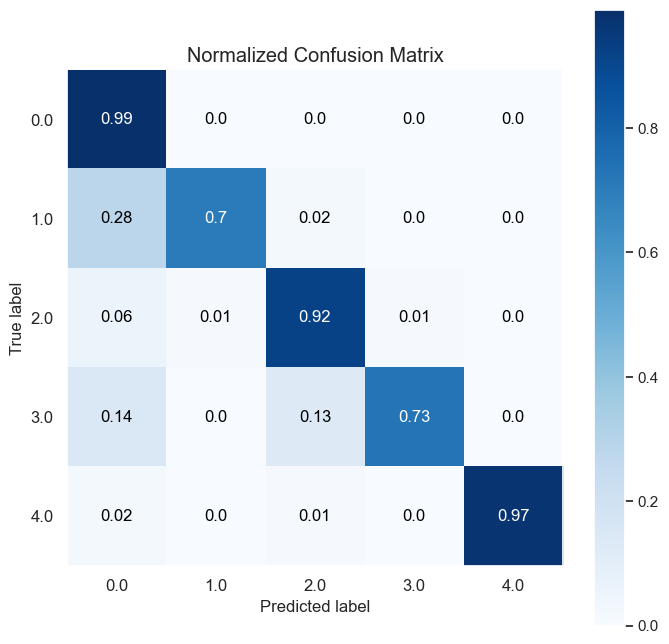

In [37]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_valid, predictions_max, normalize=True)

## 7. Tackling Class imbalance

Here i will try out whether techniques to tackle the class imbalance, improve the results
I will first test class weights and fterwards apply synthetic minority Oversampling

### Class weights

In [38]:
from sklearn.utils import class_weight
# Generating the class weights appropriate to the class imbalance
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)
class_weights

array([ 0.2416234 ,  7.87885264,  3.02561555, 27.30721248,  2.72275996])

Looking again at the class distribution of the classes, the weights seem to fit

In [39]:
y_train.value_counts()

0.0    57977
4.0     5145
2.0     4630
1.0     1778
3.0      513
Name: 187, dtype: int64

In [40]:
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train_pca.shape[1:]))
model.add(keras.layers.Dense(50,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(50,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(5, activation="softmax"))

optimizer=keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [41]:
if exists('model_class_weights.h5'):
    model = tensorflow.keras.models.load_model('model_class_weights.h5')
else:
    history=model.fit(X_train_pca, y_train, epochs=100,
          class_weight=dict(enumerate(class_weights)),
          validation_data=(X_valid_pca,y_valid),
          callbacks = early_stopping_cb, batch_size=32)

In [42]:
if not exists('model_class_weights.h5'):
    model.save('model_class_weights.h5')

In [43]:
predictions = model.predict(X_valid_pca)
predictions_max=np.argmax(predictions, axis=1)
print(classification_report(y_valid, predictions_max))
model.evaluate(X_valid_pca, y_valid)

548/548 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93     14494
         1.0       0.23      0.34      0.27       445
         2.0       0.00      0.00      0.00      1158
         3.0       0.00      0.00      0.00       128
         4.0       0.97      0.89      0.93      1286

    accuracy                           0.87     17511
   macro avg       0.42      0.44      0.43     17511
weighted avg       0.81      0.87      0.84     17511

  1/548 [..............................] - ETA: 1:01 - loss: 2.1034 - accuracy: 0.7500

c:\Users\janni\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\janni\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\janni\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


548/548 [==============================] - 1s 2ms/step - loss: 0.7125 - accuracy: 0.8710


[0.7124738097190857, 0.8709954023361206]

<AxesSubplot: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

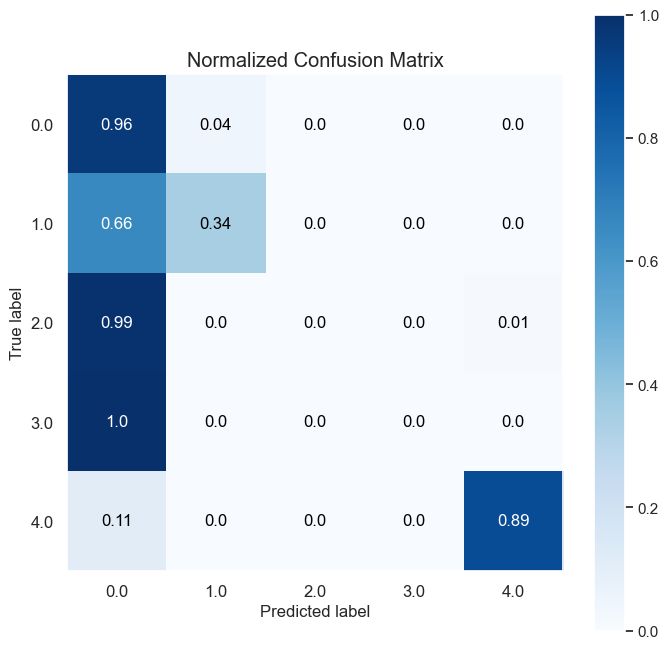

In [44]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_valid, predictions_max, normalize=True)

The applications of class weights did not perform as expected. 
Even though the weight of class 0 should have decreased drastically, almost all classes got predominantly predicted as class 0
I am unsure why this happened

### Oversample

In [45]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
#oversampling the minority classes with synthetic cases
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train_pca, y_train)

Every class has the exact same number of cases now, so an equal weighting of all classes is ensured

In [46]:
y_train_oversampled.value_counts()

0.0    57977
4.0    57977
2.0    57977
1.0    57977
3.0    57977
Name: 187, dtype: int64

In [47]:
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train_oversampled.shape[1:]))
model.add(keras.layers.Dense(50,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(50,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.Dense(5, activation="softmax"))

optimizer=keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [48]:
if exists('model_oversample.h5'):
    model = tensorflow.keras.models.load_model('model_oversample.h5')
else:
    history=model.fit(X_train_oversampled, y_train_oversampled, epochs=100,
          validation_data=(X_valid_pca,y_valid),
          callbacks = early_stopping_cb, batch_size=32)

In [49]:
if not exists('model_oversample.h5'):
    model.save('model_oversample.h5')

In [50]:
predictions = model.predict(X_valid_pca)
predictions_max=np.argmax(predictions, axis=1)
print(classification_report(y_valid, predictions_max))
model.evaluate(X_valid_pca, y_valid)

548/548 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97     14494
         1.0       0.46      0.80      0.58       445
         2.0       0.83      0.94      0.88      1158
         3.0       0.42      0.84      0.56       128
         4.0       0.92      0.97      0.94      1286

    accuracy                           0.94     17511
   macro avg       0.72      0.90      0.79     17511
weighted avg       0.96      0.94      0.95     17511

548/548 [==============================] - 1s 2ms/step - loss: 0.1883 - accuracy: 0.9419


[0.188275545835495, 0.9419222474098206]

<AxesSubplot: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

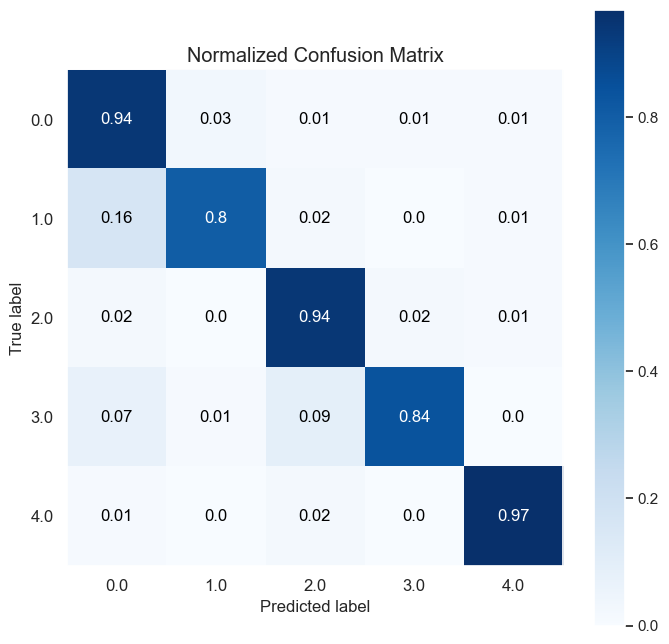

In [51]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_valid, predictions_max, normalize=True)

The f1-score is slightly worse, this is because this model focusses more on the classes 1-4 and does a way better job on them
But since class 0 is still predominantly in the validation set, the f1-score is slightly worse.
In this case it is mandatory to look at the problem it self and to analyse which model would provide a greater benefit in real world application
Since we are trying to identify heart diseasesm, so peoples lives are at stake: its more important to detect those heart diseases than to misdiagnosed a healthy patient (better safe than sorry)
This means that the recall for the classes 1-4 (that stand for heart diseases) is the most important metric.
Because the recall is higher using oversampling I choose oversampling as the right approach.

## 9. Hyperparameter Tuning

For the Hyperparameter Tuning i use the predefined validationset from before, instead of crossvalidation, because of limited processing power.
Also even though i will use the oversampling technique for the final model, i will use the normal data set for now, also because of the limited processing power that is avalable to me.

In [52]:
from sklearn.model_selection import  PredefinedSplit
split_index = [-1]*len(X_train_pca)+[0]*len(X_valid_pca)
X_split = pd.concat([X_train_pca, X_valid_pca], axis=0)
Y_split = pd.concat([y_train, y_valid], axis=0)
pds = PredefinedSplit(test_fold=split_index)
print(pd.DataFrame(split_index).value_counts)

<bound method DataFrame.value_counts of        0
0     -1
1     -1
2     -1
3     -1
4     -1
...   ..
87549  0
87550  0
87551  0
87552  0
87553  0

[87554 rows x 1 columns]>


First i find the good architecture (number of layers and neurons) using a grid search.

In [55]:

keras.backend.clear_session()
def create_model(neurons, layers):
 # create model
   model = Sequential()
   model.add(keras.layers.Flatten(input_shape=X_train_pca.shape[1:]))
   for i in range(layers):
    model.add(keras.layers.Dense(neurons,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

   model.add(keras.layers.Dense(5, activation="softmax"))
   optimizer=keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
   model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
   return model
 
model = KerasClassifier(model=create_model, epochs=20, verbose=0)
neurons = [50, 75, 100, 150]
layers = [2, 3, 4]

param_grid = dict(model__neurons=neurons, model__layers=layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=pds)
if exists('model_architecture_grid_best.pkl'):
    model_architecture_grid_best = joblib.load("model_architecture_grid_best.pkl")
else:
    grid_result = grid.fit(X_split, Y_split, callbacks = early_stopping_cb, batch_size = 32)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    params = grid_result.cv_results_['params']
    for mean, param in zip(means, params):
        print("%f with: %r" % (mean, param))
    #save your model or results
    joblib.dump(grid, 'model_architecture_grid_best.pkl')

Best: 0.980070 using {'model__layers': 4, 'model__neurons': 75}
0.976358 with: {'model__layers': 2, 'model__neurons': 50}
0.976586 with: {'model__layers': 2, 'model__neurons': 75}
0.975158 with: {'model__layers': 2, 'model__neurons': 100}
0.978414 with: {'model__layers': 2, 'model__neurons': 150}
0.976529 with: {'model__layers': 3, 'model__neurons': 50}
0.978813 with: {'model__layers': 3, 'model__neurons': 75}
0.978870 with: {'model__layers': 3, 'model__neurons': 100}
0.979156 with: {'model__layers': 3, 'model__neurons': 150}
0.974987 with: {'model__layers': 4, 'model__neurons': 50}
0.980070 with: {'model__layers': 4, 'model__neurons': 75}
0.976872 with: {'model__layers': 4, 'model__neurons': 100}
0.978928 with: {'model__layers': 4, 'model__neurons': 150}


Now i find the right learning rate schedule 
I will use randomized search here,  because there are more variables and random search is more efficient in these cases.

In [69]:
keras.backend.clear_session()
def create_model(learning_rate, momentum, decay, nesterov):
 # create model
   model = Sequential()
   model.add(keras.layers.Flatten(input_shape=X_train_pca.shape[1:]))
   for i in range(4):
    model.add(keras.layers.Dense(75,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

   model.add(keras.layers.Dense(5, activation="softmax"))
   s = 20 * len(X_train_pca) // 32
   learning_schedule = keras.optimizers.schedules.ExponentialDecay(learning_rate, s, decay)
   optimizer=keras.optimizers.SGD(learning_rate=learning_schedule, momentum=momentum, nesterov=nesterov)
   model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
   return model
 
model = KerasClassifier(model=create_model, epochs=20, verbose=0)
nesterov=[True, False]
learning_rate = [1e-2, 5e-3, 1e-3]
decay =[0.1, 5e-2, 1e-2]
momentum = [0.8, 0.9, 0.95]

param_grid = dict(model__learning_rate=learning_rate, model__momentum=momentum, model__decay=decay, model__nesterov=nesterov)
random = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=1, cv=pds, n_iter=15)
if exists('model_schedule_random_best.pkl'):
    model_schedule_random_best = joblib.load("model_schedule_random_best.pkl")
    print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
    for mean, param in zip(means, params):
        print("%f with: %r" % (mean, param))
else:
    random_result = random.fit(X_split, Y_split, callbacks = early_stopping_cb, batch_size =32)
    print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
    means = random_result.cv_results_['mean_test_score']
    stds = random_result.cv_results_['std_test_score']
    params = random_result.cv_results_['params']
    for mean, param in zip(means, params):
        print("%f with: %r" % (mean, param))
    #save your model or results
    joblib.dump(grid, 'model_schedule_random_best.pkl')

Best: 0.983153 using {'model__nesterov': True, 'model__momentum': 0.95, 'model__learning_rate': 0.01, 'model__decay': 0.01}
0.973959 with: {'model__nesterov': False, 'model__momentum': 0.9, 'model__learning_rate': 0.001, 'model__decay': 0.01}
0.981497 with: {'model__nesterov': True, 'model__momentum': 0.95, 'model__learning_rate': 0.005, 'model__decay': 0.1}
0.976986 with: {'model__nesterov': True, 'model__momentum': 0.8, 'model__learning_rate': 0.005, 'model__decay': 0.01}
0.980584 with: {'model__nesterov': True, 'model__momentum': 0.95, 'model__learning_rate': 0.005, 'model__decay': 0.01}
0.982126 with: {'model__nesterov': True, 'model__momentum': 0.9, 'model__learning_rate': 0.01, 'model__decay': 0.1}
0.983153 with: {'model__nesterov': True, 'model__momentum': 0.95, 'model__learning_rate': 0.01, 'model__decay': 0.01}
0.979156 with: {'model__nesterov': True, 'model__momentum': 0.8, 'model__learning_rate': 0.01, 'model__decay': 0.01}
0.977386 with: {'model__nesterov': False, 'model__m

In [67]:
#save your model or results
joblib.dump(random, 'model_schedule_random_best.pkl')

INFO:tensorflow:Assets written to: C:\Users\janni\AppData\Local\Temp\tmp5aj4fdt1\assets


['model_schedule_random_best.pkl']

loss function, batchsize and activation function will stay the same for now but lets try some alpha dropout.

In [84]:

model_alpha = keras.models.Sequential()
model_alpha.add(keras.layers.Flatten(input_shape=X_train_pca.shape[1:]))
for i in range(4):
    model_alpha.add(keras.layers.Dense(75,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
    model_alpha.add(keras.layers.AlphaDropout(rate=0.1))

model_alpha.add(keras.layers.Dense(5, activation="softmax"))
s = 20 * len(X_train_pca) // 32
learning_schedule = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.01)
optimizer=keras.optimizers.SGD(learning_rate=learning_schedule, momentum=0.95, nesterov=True)

model_alpha.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


In [86]:
if exists('model_alpha.h5'):
    model = tensorflow.keras.models.load_model('model_alpha.h5')
else:
    history=model_alpha.fit(X_train_pca, y_train, epochs=100,
          validation_data=(X_valid_pca,y_valid),
          callbacks = early_stopping_cb, batch_size=32)
    model_alpha.save('model_alpha.h5')

Epoch 1/100
2189/2189 [==============================] - 11s 5ms/step - loss: 0.2862 - accuracy: 0.9221 - val_loss: 0.1893 - val_accuracy: 0.9515
Epoch 2/100
2189/2189 [==============================] - 10s 5ms/step - loss: 0.1962 - accuracy: 0.9475 - val_loss: 0.1812 - val_accuracy: 0.9567
Epoch 3/100
2189/2189 [==============================] - 10s 4ms/step - loss: 0.1689 - accuracy: 0.9541 - val_loss: 0.1406 - val_accuracy: 0.9603
Epoch 4/100
2189/2189 [==============================] - 10s 5ms/step - loss: 0.1552 - accuracy: 0.9575 - val_loss: 0.1453 - val_accuracy: 0.9627
Epoch 5/100
2189/2189 [==============================] - 10s 4ms/step - loss: 0.1439 - accuracy: 0.9603 - val_loss: 0.1140 - val_accuracy: 0.9696
Epoch 6/100
2189/2189 [==============================] - 10s 4ms/step - loss: 0.1366 - accuracy: 0.9619 - val_loss: 0.1232 - val_accuracy: 0.9665
Epoch 7/100
2189/2189 [==============================] - 10s 5ms/step - loss: 0.1286 - accuracy: 0.9635 - val_loss: 0.1187 -

In [74]:
predictions = model_alpha.predict(X_valid_pca)
predictions=np.argmax(predictions, axis=1)
print(classification_report(y_valid, predictions))
model_alpha.evaluate(X_valid_pca, y_valid)

548/548 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     14494
         1.0       0.88      0.67      0.76       445
         2.0       0.92      0.93      0.92      1158
         3.0       0.65      0.73      0.69       128
         4.0       0.96      0.98      0.97      1286

    accuracy                           0.97     17511
   macro avg       0.88      0.86      0.87     17511
weighted avg       0.97      0.97      0.97     17511

548/548 [==============================] - 1s 2ms/step - loss: 0.0980 - accuracy: 0.9736


[0.09803155809640884, 0.9736166000366211]

Here i will change the activation and kernel initialization and bet on batch normalization instead of self normalization

In [77]:

model_batch = keras.models.Sequential()
model_batch.add(keras.layers.Flatten(input_shape=X_train_pca.shape[1:]))
model_batch.add(keras.layers.BatchNormalization())
for i in range(4):
    model_batch.add(keras.layers.Dense(75,
                                 kernel_initializer="he_normal",
                                 activation="elu"))
    model_batch.add(keras.layers.BatchNormalization())

model_batch.add(keras.layers.Dense(5, activation="softmax"))
s = 20 * len(X_train_pca) // 32
learning_schedule = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer=keras.optimizers.SGD(learning_rate=learning_schedule, momentum=0.95, nesterov=False)

model_batch.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


In [78]:
if exists('model_batch_normalization.h5'):
    model = tensorflow.keras.models.load_model('model_batch_normalization.h5')
else:
    history=model_batch.fit(X_train_pca, y_train, epochs=100,
          validation_data=(X_valid_pca,y_valid),
          callbacks = early_stopping_cb, batch_size=32)
    model_batch.save('model_class_batch_normalization.h5')

Epoch 1/100
2189/2189 [==============================] - 21s 9ms/step - loss: 0.2152 - accuracy: 0.9383 - val_loss: 0.1188 - val_accuracy: 0.9671
Epoch 2/100
2189/2189 [==============================] - 18s 8ms/step - loss: 0.1369 - accuracy: 0.9614 - val_loss: 0.1080 - val_accuracy: 0.9696
Epoch 3/100
2189/2189 [==============================] - 18s 8ms/step - loss: 0.1179 - accuracy: 0.9664 - val_loss: 0.0968 - val_accuracy: 0.9726
Epoch 4/100
2189/2189 [==============================] - 18s 8ms/step - loss: 0.1066 - accuracy: 0.9693 - val_loss: 0.0880 - val_accuracy: 0.9741
Epoch 5/100
2189/2189 [==============================] - 18s 8ms/step - loss: 0.0973 - accuracy: 0.9712 - val_loss: 0.0867 - val_accuracy: 0.9757
Epoch 6/100
2189/2189 [==============================] - 18s 8ms/step - loss: 0.0927 - accuracy: 0.9729 - val_loss: 0.0808 - val_accuracy: 0.9770
Epoch 7/100
2189/2189 [==============================] - 19s 9ms/step - loss: 0.0877 - accuracy: 0.9743 - val_loss: 0.0757 -

In [79]:
predictions = model_batch.predict(X_valid_pca)
predictions=np.argmax(predictions, axis=1)
print(classification_report(y_valid, predictions))
model_batch.evaluate(X_valid_pca, y_valid)

548/548 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     14494
         1.0       0.93      0.73      0.82       445
         2.0       0.95      0.95      0.95      1158
         3.0       0.84      0.80      0.82       128
         4.0       0.98      0.99      0.99      1286

    accuracy                           0.98     17511
   macro avg       0.94      0.89      0.91     17511
weighted avg       0.98      0.98      0.98     17511

548/548 [==============================] - 2s 3ms/step - loss: 0.0641 - accuracy: 0.9824


[0.06406562775373459, 0.9824110269546509]

In this run i will use the best architecture and learning schedule i found and also reimplement the synthetic oversample.

In [87]:
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train_oversampled.shape[1:]))
for i in range(4):
    model.add(keras.layers.Dense(75,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))


model.add(keras.layers.Dense(5, activation="softmax"))
s = 20 * len(X_train_oversampled) // 32
learning_schedule = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer=keras.optimizers.SGD(learning_rate=learning_schedule, momentum=0.95, nesterov=False)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [82]:
if exists('model_overall_best_oversampled.h5'):
    model = tensorflow.keras.models.load_model('model_overall_best_oversampled.h5')
else:   
    history=model.fit(X_train_oversampled, y_train_oversampled, epochs=100, batch_size=32, callbacks = early_stopping_cb, validation_data=(X_valid_pca,y_valid))

Epoch 1/100
9059/9059 [==============================] - 33s 4ms/step - loss: 0.1507 - accuracy: 0.9549 - val_loss: 0.2378 - val_accuracy: 0.9368
Epoch 2/100
9059/9059 [==============================] - 34s 4ms/step - loss: 0.1094 - accuracy: 0.9676 - val_loss: 0.1667 - val_accuracy: 0.9568
Epoch 3/100
9059/9059 [==============================] - 34s 4ms/step - loss: 0.0728 - accuracy: 0.9779 - val_loss: 0.1808 - val_accuracy: 0.9516
Epoch 4/100
9059/9059 [==============================] - 35s 4ms/step - loss: 0.0536 - accuracy: 0.9836 - val_loss: 0.1574 - val_accuracy: 0.9657
Epoch 5/100
9059/9059 [==============================] - 30s 3ms/step - loss: 0.0379 - accuracy: 0.9882 - val_loss: 0.2100 - val_accuracy: 0.9495
Epoch 6/100
9059/9059 [==============================] - 30s 3ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.1831 - val_accuracy: 0.9652
Epoch 7/100
9059/9059 [==============================] - 29s 3ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.1735 -

In [83]:
if not exists('model_overall_best_oversampled.h5'):
    model.save('model_overall_best_oversampled.h5')

In [ ]:
df_test = pd.read_csv("D:\Programming\Python\Kaggle\ECG\mitbih_test.csv\mitbih_test.csv", header = None)

In [ ]:
y_test = df_test[187]

X_test = df_test.drop(columns=[187])
X_test

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test = pipeline.fit_transform(X_test)

In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-7.309951,1.629724,-1.091343,-0.126587,1.518857,-1.549589,-1.463552,-1.194446,0.735530,-0.070021,...,-1.194751,-0.184427,0.931301,-0.634355,-0.096576,0.939842,0.042710,-0.414892,0.273227,0.408205
1,2.104051,-4.255139,3.850584,-1.536121,-0.756867,0.946998,-1.753369,3.039110,-0.590055,3.774678,...,-0.628124,0.425527,-0.343309,0.296731,0.129574,-0.206709,-0.071326,0.213473,-0.312746,0.146902
2,-4.824925,0.074677,-0.987677,2.219120,-1.343000,-0.158773,-1.384837,1.704388,-2.203510,-1.802655,...,-0.122099,0.468286,-0.274851,0.001365,0.395206,-0.042509,-0.644286,0.525676,-0.231526,-0.194592
3,-1.758025,-2.090584,0.435136,3.399886,-3.553875,1.629544,0.018162,0.987409,2.971256,1.544771,...,-0.281387,0.063497,-0.007417,0.017938,-0.053601,0.204457,-0.144619,0.085984,-0.097275,0.139819
4,1.775457,-2.599217,-1.872160,4.441850,-1.464669,-0.425784,-2.970184,0.037945,-0.151505,-3.330140,...,0.434888,0.287510,-0.132796,-0.437780,0.678832,-0.411435,0.064866,-0.065679,0.158750,-0.205970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,11.002145,-6.372447,-1.883165,4.831114,0.166681,-3.728317,0.222309,-3.597154,4.660302,0.566252,...,-0.090491,0.061500,-0.555060,0.127090,0.117570,-0.161494,0.152817,-0.150687,0.064476,-0.193264
21888,16.720794,-7.719383,-1.713401,2.973741,1.221626,-0.058072,-2.951121,-3.840843,3.022949,1.889347,...,-0.669605,0.291121,0.432191,1.007603,-0.303141,-0.496968,-0.442506,0.702462,-0.303126,-0.313452
21889,-6.291756,1.523184,-3.058941,2.669804,0.092190,-1.803773,1.083465,-0.311010,-0.440176,-0.797029,...,0.158385,-0.216801,-0.252324,-0.218321,0.083331,0.122967,-0.142328,-0.010616,0.095086,-0.225119
21890,0.443333,-1.409001,-2.655929,2.791130,0.798416,-4.633985,3.440051,0.261094,0.603545,-0.207963,...,0.399963,0.236803,-0.682851,0.630552,-0.135485,-0.357820,-0.103846,0.216168,-0.211080,-0.126862


In [ ]:
predictions = model.predict(X_test)
predictionsmax=np.argmax(predictions, axis=1)
print(classification_report(y_test, predictionsmax))
model.evaluate(X_test, y_test)

685/685 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.89      0.72      0.80       556
         2.0       0.96      0.94      0.95      1448
         3.0       0.77      0.75      0.76       162
         4.0       0.99      0.98      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.92      0.88      0.90     21892
weighted avg       0.98      0.98      0.98     21892

685/685 [==============================] - 1s 2ms/step - loss: 0.0929 - accuracy: 0.9812


[0.09289046376943588, 0.9811803102493286]

0.9543

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictionsmax)



array([[18022,    39,    29,    13,    15],
       [  140,   401,    13,     1,     1],
       [   53,     7,  1364,    22,     2],
       [   30,     1,     9,   122,     0],
       [   25,     2,    10,     0,  1571]], dtype=int64)

In [ ]:
conf_mat = confusion_matrix(y_test, predictionsmax)
TP1 = (conf_mat[1,1]+conf_mat[2,2]+conf_mat[3,3]+conf_mat[4,4])/sum(sum(conf_mat[1:5, 1:5]))
print(TP1)
TP = sum(sum(conf_mat[1:5, 1:5]))/sum(sum(conf_mat[1:5, 0:5]))
TP

0.9807146908678389


0.9342872284048754

0.005 % werden fälschlicherweise als krank angesehen 
0.9342 der Kranken werden erfasst
0.9807 werden richtig kategorisiert

In [ ]:
y_test

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: 187, Length: 21892, dtype: float64

In [ ]:
predictions.shape

(21892, 5)

# 10. Final Model Evaluation

<AxesSubplot: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

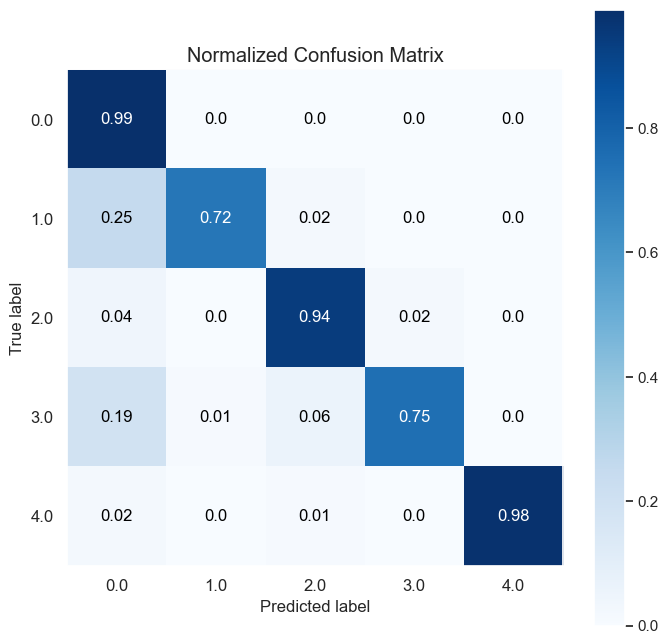

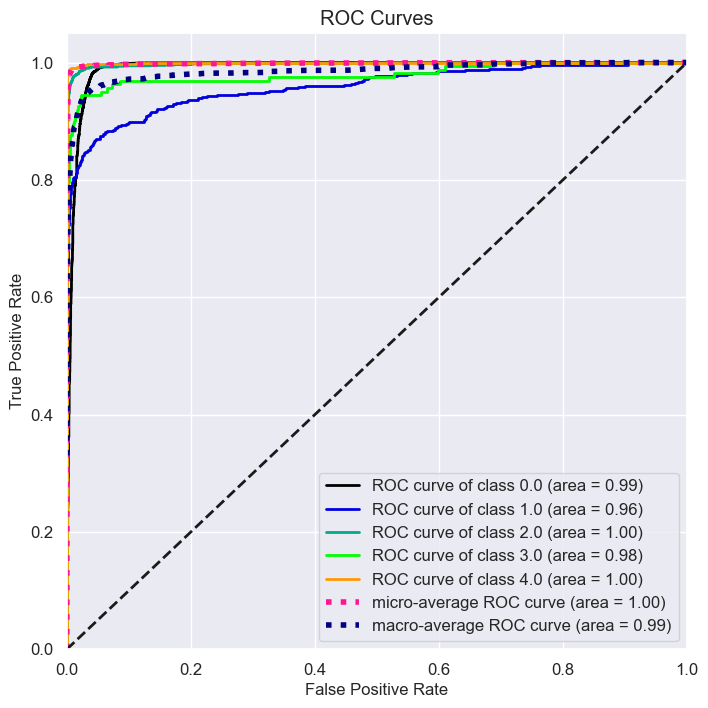

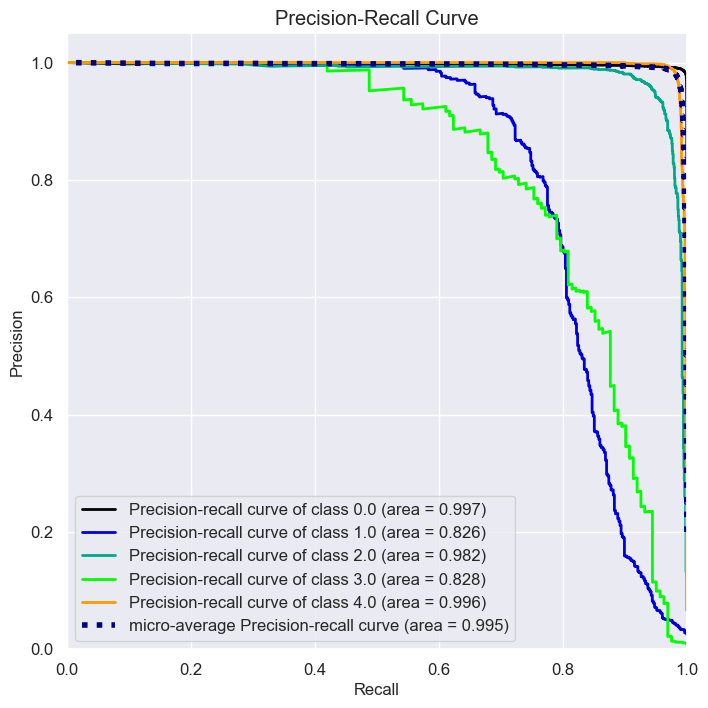

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_test, predictionsmax, normalize=True)
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(y_test, predictions)
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(y_test, predictions)

In [ ]:
y_test.shape


(21892,)

In [ ]:
predictions.shape

(21892, 5)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center left", fontsize=16)  
    plt.xlabel("Threshold", fontsize=16)   
    plt.title(values_to_keep)     
    plt.grid(True)                              
    plt.axis([-1.1, 1.1, 0, 1.1])             

0.001662427
0.91283166
0.021829039
0.9994468


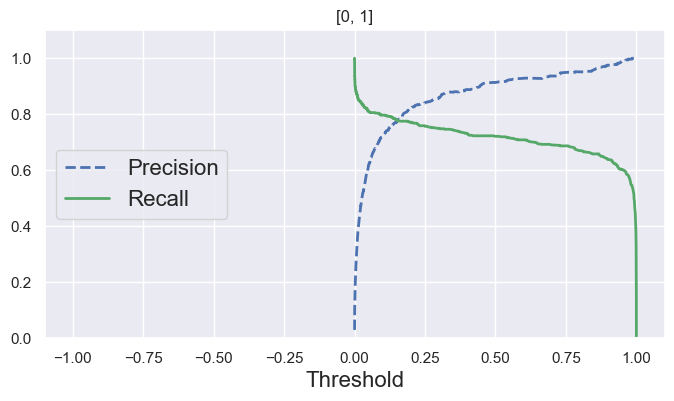

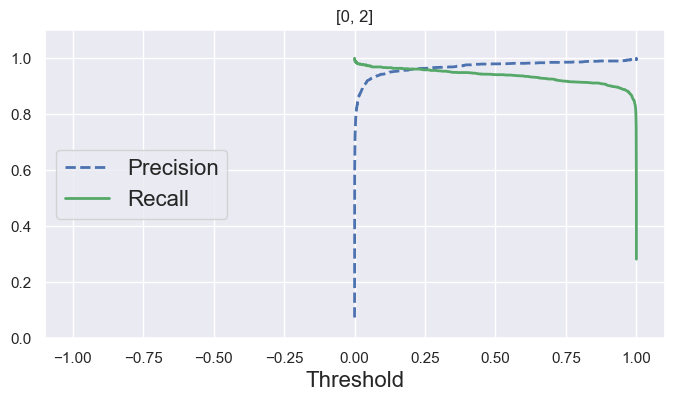

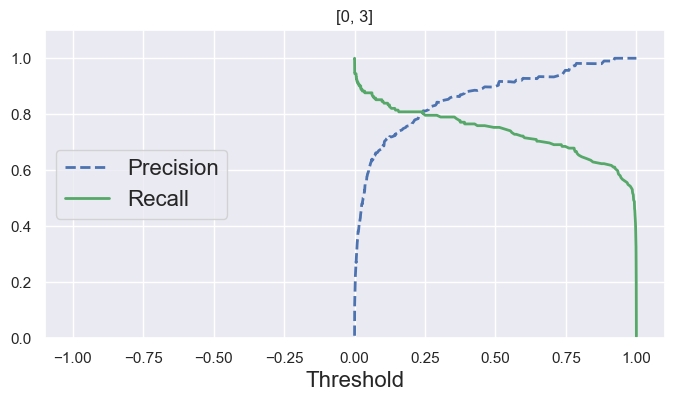

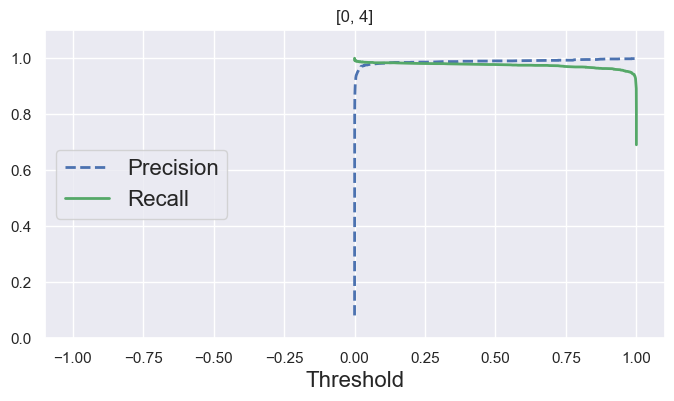

In [ ]:
from sklearn.metrics import precision_recall_curve
for values_to_keep in [[0,1],[0,2],[0,3],[0,4]]:
    # Create a boolean mask indicating which elements should be kept
   
    mask = np.isin(y_test, values_to_keep)
    
    # Use the mask to keep only the rows where the value is value_to_keep
    y_true = y_test[mask]
    prediction = predictions[mask, :]
    #prediction = prediction / prediction.sum(axis=1, keepdims=True)
    precisions, recalls, thresholds = precision_recall_curve(y_true, prediction[:,values_to_keep[1]], pos_label=values_to_keep[1])
    threshold_90_precision = thresholds[np.argmin(recalls >= 0.90)]
    print(threshold_90_precision)
    plt.figure(figsize=(8, 4))                                                              
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
